# Beispiel Berechnung $H^1$ Norm und Skalarprodukt

Wir berechnen die $H^1$ Norm für

$$u(x,y) = \big(x-\frac{1}{2}\big)\cdot \big(y-\frac{1}{2}\big)$$

auf $\Omega = [0,1]^2 \subset \mathbb{R}^2$ zum einen analytisch und zum andern numerisch mit Hilfe von NGSolve.

In [1]:
from netgen.geom2d import unit_square
from ngsolve import *
from ngsolve.webgui import Draw

Diskretisierung des Gebiets:

In [2]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.1))

## Numerisch

Wir benutzen für die numerische Berechnung finite Elemente für den $H^1$:

In [3]:
V = H1(mesh,order=2)
gfu = GridFunction(V)

Funktionen aus dem FE-Raum werden in NGSolve GridFunction genannt. Wir setzen die Werte von $u(x,y)\in V$  auf

$$u(x,y) = \big(x-\frac{1}{2}\big)\cdot \big(y-\frac{1}{2}\big).$$

In [4]:
gfu.Set((x-0.5)*(y-.5))
Draw(gfu,mesh,'u')

WebGuiWidget(value={'ngsolve_version': '6.2.2104-121-gee6902d12', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, '…

BaseWebGuiScene

Für das Integral

$$\int_\Omega u^2(x,y) d\Omega$$

erhalten wir mit Hilfe numerischer Integration:

In [5]:
Integrate(gfu**2,mesh)

0.006944444444444417

Und für 

$$\int_\Omega \nabla u(x,y)\cdot\nabla u(x,y) d\Omega$$

folgt

In [6]:
Integrate(grad(gfu)*grad(gfu),mesh)

0.16666666666666602

Damit folgt für die $H^1$-Norm

$$\|u\|_{H^1} = \left(\int_\Omega u^2(x,y) d\Omega + \int_\Omega \nabla u(x,y)\cdot\nabla u(x,y) d\Omega\right)^{1/2}$$

In [7]:
(Integrate(gfu**2,mesh)+Integrate(grad(gfu)*grad(gfu),mesh))**0.5

0.41666666666666585

Im Sobolevraum $H^1$ ist das Skalarprodukt gegeben durch

$$(u,v)_{H^1} = \int_\Omega u(x,y)\cdot v(x,y)\, d\Omega + \int_\Omega \nabla u(x,y)\cdot\nabla v(x,y) d\Omega.$$

Wir berechnen $(u,v)$, wobei $v$ gegeben sei durch

$$v(x,y) = 1-\big(x-\frac{1}{2}\big)^2\cdot \big(y-\frac{1}{2}\big)^2.$$

In [8]:
gfv = GridFunction(V)
gfv.Set(1-(x-0.5)**2*(y-0.5)**2)
Draw(gfv,mesh,'v')

WebGuiWidget(value={'ngsolve_version': '6.2.2104-121-gee6902d12', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, '…

BaseWebGuiScene

Das Skalarprodukt $(u,v)_{H^1}$ ist gegeben durch

In [9]:
Integrate(gfu*gfv,mesh)+Integrate(grad(gfu)*grad(gfv),mesh)

-5.79696063203168e-06

## Analytisch

Wir berechnen nun mit Hilfe von `sympy` analytisch die Norm und das Skalarprodukt:

In [10]:
import sympy as sp

# Um die Symbole x,y (Koordinaten in NGSolve nicht zu 
# überschreiben wählen wir andere Namen)
xs,ys = sp.symbols('x,y')

u = (xs-1/2)*(ys-1/2)
u

(x - 0.5)*(y - 0.5)

Für das Integral

$$\int_\Omega u^2(x,y) d\Omega$$

erhalten wir

In [11]:
sp.integrate(u**2,(xs,0,1),(ys,0,1))

0.00694444444444445

und für

$$\int_\Omega \nabla u(x,y)\cdot\nabla u(x,y) d\Omega = \int_\Omega \partial_x u(x,y)\, \partial_x v(x,y) + \partial_y u(x,y)\, \partial_y v(x,y) d\Omega$$

folgt

In [12]:
sp.integrate(u.diff(xs)*u.diff(xs)+u.diff(ys)*u.diff(ys),(xs,0,1),(ys,0,1))

0.166666666666667

Damit erhalten wir für die $H^1$-Norm

$$\|u\|_{H^1} = \left(\int_\Omega u^2(x,y) d\Omega + \int_\Omega \nabla u(x,y)\cdot\nabla u(x,y) d\Omega\right)^{1/2}$$

In [13]:
(sp.integrate(u**2,(xs,0,1),(ys,0,1))+
 sp.integrate(u.diff(xs)*u.diff(xs)+
              u.diff(ys)*u.diff(ys),(xs,0,1),(ys,0,1)))**0.5

0.416666666666667

und für das Skalarprodukt mit der gegebenen Funktion $v$

$$(u,v)_{H^1} = \int_\Omega u(x,y)\cdot v(x,y)\, d\Omega + \int_\Omega \nabla u(x,y)\cdot\nabla v(x,y) d\Omega$$

In [14]:
v = 1-(xs-1/2)**2*(ys-1/2)**2
v

-(x - 0.5)**2*(y - 0.5)**2 + 1

In [15]:
(sp.integrate(u*v,(xs,0,1),(ys,0,1))+
 sp.integrate(u.diff(xs)*v.diff(xs)+
              u.diff(ys)*v.diff(ys),(xs,0,1),(ys,0,1)))

0

Die beiden Funktionen stehe daher senkrecht zu einander.

**Achung:** Das numerische und analytische Resultat stimmt nicht überein. Die Genauigkeit der numerischen Rechnung ist noch zu unpräzise. Entsprechend sollte eine feinere Diskretisierung oder höhere Polynom Ordnung für die Approximation des Sobolevraums gewählt werden.

**Aufgabe:** Studieren Sie die Konvergenz bezüglich Feinheit der Diskretisierung und der Ordnung der FEM Approximation des Sobolevraums $H^1$.

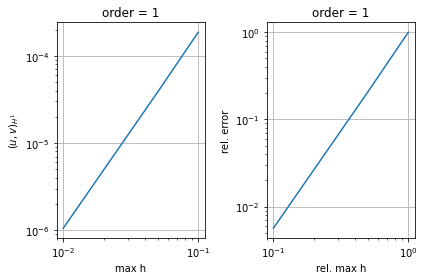

In [16]:
import matplotlib.pyplot as plt
import numpy as np

order = 1
scalProd = []
for maxh in [1e-1,5e-2,1e-2]:
    mesh = Mesh(unit_square.GenerateMesh(maxh=maxh))
    V = H1(mesh,order=order)
    gfu = GridFunction(V)
    gfv = GridFunction(V)
    with TaskManager():
        gfu.Set((x-0.5)*(y-.5))
        gfv.Set(1-(x-0.5)**2*(y-0.5)**2)
        scalProd.append([maxh, Integrate(gfu*gfv,mesh,order=order)+Integrate(grad(gfu)*grad(gfv),mesh,order=order)])
scalProd = np.array(scalProd)

plt.subplot(1,2,1)
plt.loglog(scalProd[:,0],np.abs(scalProd[:,1]))
plt.xlabel('max h')
plt.ylabel('$(u,v)_{H^1}$')
plt.grid()
plt.title('order = 1')

plt.subplot(1,2,2)
plt.loglog(scalProd[:,0]/scalProd[0,0],np.abs(scalProd[:,1]/scalProd[0,1]))
plt.xlabel('rel. max h')
plt.ylabel('rel. error')
plt.grid()
plt.title('order = 1')
plt.tight_layout()
plt.show()

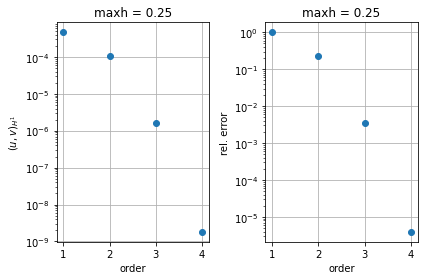

In [19]:
maxh = 2.5e-1
scalProd = []
for order in range(1,5):
    mesh = Mesh(unit_square.GenerateMesh(maxh=maxh))
    V = H1(mesh,order=order)
    gfu = GridFunction(V)
    gfv = GridFunction(V)
    with TaskManager():
        gfu.Set((x-0.5)*(y-.5))
        gfv.Set(1-(x-0.5)**2*(y-0.5)**2)
        scalProd.append([order, Integrate(gfu*gfv,mesh,order=order)+Integrate(grad(gfu)*grad(gfv),mesh,order=order)])
scalProd = np.array(scalProd)

plt.subplot(1,2,1)
plt.semilogy(scalProd[:,0],np.abs(scalProd[:,1]),'o')
plt.xlabel('order')
plt.ylabel('$(u,v)_{H^1}$')
plt.grid()
plt.title('maxh = 0.25')

plt.subplot(1,2,2)
plt.semilogy(scalProd[:,0],np.abs(scalProd[:,1]/scalProd[0,1]),'o')
plt.xlabel('order')
plt.ylabel('rel. error')
plt.grid()
plt.title('maxh = 0.25')
plt.tight_layout()
plt.show()

Anstelle von `GridFunction` können wir im Beispiel auch direkt `CoefficientFunction` benutzen. In dem Fall ist kein FE-Space notwendig. Die `CoefficientFunction` sind algebraische Ausdrücke. Die Ableitungen sind jedoch selber zu definieren.

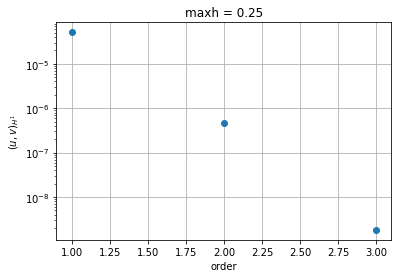

In [20]:
maxh = 2.5e-1
mesh = Mesh(unit_square.GenerateMesh(maxh=maxh))

scalProd = []
uCF = (x-0.5)*(y-.5)
vCF = 1-(x-0.5)**2*(y-0.5)**2

for order in range(1,4):
    with TaskManager():
        scalProd.append([order, Integrate(uCF*vCF,mesh,order=order)+
                                Integrate(uCF.Diff(x)*vCF.Diff(x)+
                                          uCF.Diff(y)*vCF.Diff(y),mesh,order=order)])
scalProd = np.array(scalProd)

plt.semilogy(scalProd[:,0],np.abs(scalProd[:,1]),'o')
plt.xlabel('order')
plt.ylabel('$(u,v)_{H^1}$')
plt.grid()
plt.title('maxh = 0.25')
plt.show()